In [3]:
import numpy as np
from scipy import stats

# Random Number Generation

Random numbers are useful for a variety of purposes, such as generating data encryption keys, simulating and modeling complex phenomena and for selecting random samples from larger data sets. 

We have generated random numbers using Python available functions, such `np.random` and Scipy's `rvs` methods. But we haven't really given any details on how these numbers are actually generated. In the physical world, we can identify two origins for what we normally call randomness:

- Ignorance about the full state variables of the process.
- Microscopic quantum effects.
- Chaotic dynamical processes.

As examples of processes belonging to the first kind we have coins, dice, or any complicated process that is in principle deterministic, but for which the number of variables involved are so large that is impossible to predict in practice. Processes of the second kind include electric noise and radioactive decay. As a third possible class we can also consider chaotic processes, for which, even if the number of variables are small, the exponential divergence of trajectories in phase space from almost equal initial conditions render the prediction of any outcome practically impossible. The double pendulum is an example of a chaotic system, as is climate. If you want to know more about true random sources, visit https://www.random.org/randomness/.

These are sources of true randomness. But if we would want to leverage them for computational purposes we would be in trouble, since that would require specialized hardware which is expensive and slow, far more slower that any implementation we have already used. If you really need true random numbers (which you probably don't), it is best to use specialized services, as the ones provided by www.random.org.

Computer are deterministic systems, the follow a program by the letter, so they are no good sources of randomness. The answer to generating random numbers efficiently in a computer is not to generate random numbers, but to generate something that looks random, yet is completely deterministic. Of course, there is a lot of statistical theory behind the requirements for something to look random enough. When discussing single numbers, a random number is one that is drawn from a set of possible values, each of which is equally probable, i.e., a uniform distribution. When discussing a sequence of random numbers, each number drawn must be statistically independent of the others.

Computers use numerical routines called **Pseudo Random Number Generators PRNG**. As the word ‘pseudo’ suggests, pseudo-random numbers are not random in the way you might expect, at least not if you're used to dice rolls or lottery tickets. Essentially, PRNGs are algorithms that use mathematical formulae or simply precalculated tables to produce sequences of numbers that appear random. PRNGs are efficient, meaning they can produce many numbers in a short time, and deterministic, meaning that a given sequence of numbers can be reproduced at a later date if the starting point in the sequence is known. Efficiency is a nice characteristic if your application needs many numbers, and determinism is handy if you need to replay the same sequence of numbers again at a later stage. PRNGs are typically also periodic, which means that the sequence will eventually repeat itself. While periodicity is hardly ever a desirable characteristic, modern PRNGs have a period that is so long that it can be ignored for most practical purposes. Pseudo random numbers just mimic the statistical properties of true random numbers, but are not truly random.

These characteristics make PRNGs suitable for applications where many numbers are required and where it is useful that the same sequence can be replayed easily. Popular examples of such applications are simulation and modeling applications. It is important to be able to efficiently generate independent random variables from the uniform distribution on (0, 1), since:
- Random variables from all other distributions can be obtained by transforming uniform random variables;
- Simulations require many random numbers.

A 'good' random-number generator should satisfy the following properties:
- **Uniformity:** The numbers generated appear to be distributed uniformly on (0, 1);
- **Independence:** The numbers generated show no correlation with each other;
- **Replication:** The numbers should be replicable (e.g., for debugging or comparison of different systems).
- **Cycle length:** It should take long before numbers start to repeat;
- **Speed:** The generator should be fast;
- **Memory usage:** The generator should not require a lot of storage.

Most random-number generators are of the form:

```
Start with z[0] (seed)
For n = 1, 2, ... generate
    z[n] = f (z[n-1])
and
    u[n] = g[z_n]
```

- f is the pseudo-random generator
- g is the output function
- $\{u_0, u_1, \ldots\}$ is the sequence of uniform random numbers on the interval (0, 1).

## The linear congruential generator

This is the first and only PRNG algorithm we will study in this course. It is of historical importance, but has been replaced by algorithms with much better statistical properties. Nevertheless, the LCG is very useful to understand how PRNG work in practice. DO NOT USE THIS ALGORITHM, except for pedagogical purposes. 

LCG produce a sequence of integers between $0$ and $m - 1$ according to
$$
z_n = (a z_n - 1 + c) mod m,\quad n = 1, 2, \ldots
$$
$a$ is the multiplier, $c$ the increment and $m$ the modulus.

To obtain uniform random numbers on (0, 1) we take
$$
u_n = \frac{z_n}{m}
$$

A good choice of a, c and m is very important. A linear congruential generator has full period (cycle length is $m$) if and only if the following conditions hold:
- The only positive integer that exactly divides both $m$ and $c$ is 1;
- If $q$ is a prime number that divides $m$, then $q$ divides $a - 1$;
- If 4 divides $m$, then 4 divides $a - 1$.

In [4]:
def random_lcg(seed=0, m=2**32, a=1103515245, c=12345, size=1):
    sample = []
    x = seed
    for _ in range(size):
        x = (a*x + c) % m
        sample.append(x)
    return np.array(sample)

In [5]:
# Full period of 13
random_lcg(seed=1, m=13, a=1, c=5, size=20)

array([ 6, 11,  3,  8,  0,  5, 10,  2,  7, 12,  4,  9,  1,  6, 11,  3,  8,
        0,  5, 10])

In [6]:
# Period 12
random_lcg(seed=1, m=13, a=2, c=5, size=20)

array([ 7,  6,  4,  0,  5,  2,  9, 10, 12,  3, 11,  1,  7,  6,  4,  0,  5,
        2,  9, 10])

In [7]:
# Period 1
random_lcg(seed=8, m=13, a=2, c=5, size=20)

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

For it to be useful, a PRNG should have large period. The LCG is periodic with period at most $m$, so it is important to use a large value for $m$. A good choice for the parameters is: $m = 2^{32}$, $a = 1103515245$, and $c = 12345.$

A good PRNG should be uniformly distributed. Typically, this is verified through an appropriate statistical test, such as a Chi-squared test or the Kolmogorov-Smirnov. Graphically, verify that the LCG outputs a uniform sample below.

>#### Exercise
Generate a sequence of one million random numbers with parameters $m=2^{32}$,
$a=1103515245$, and $c=12345$. Confirm that the distribution looks
uniform. Experiment with samples of different size.

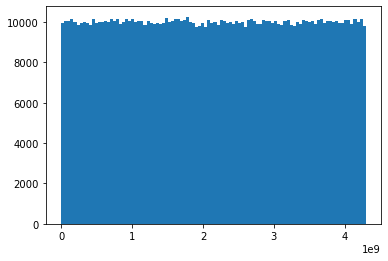

In [22]:
# Return the following variable correctly
sample = 0
### BEGIN SOLUTION
sample = random_lcg(size=1000000)
plt.hist(sample, bins=100);
### END SOLUTION

In [23]:
### BEGIN HIDDEN TESTS
from scipy import stats
tcdf = stats.uniform(0, int(2**32))
test = stats.kstest(sample, tcdf.cdf)
assert test.pvalue > 0.1
### END HIDDEN TESTS

>#### Exercise
Create a new function, based on the LCG function you created previously, to
generate uniformed distributed random numbers between 0 and 1. 
Call this function random_uniform().
Plot a histogram for 1,000,000 samples and verify the distribution is indeed uniform.

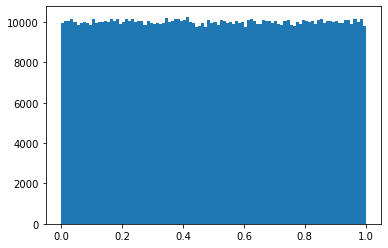

In [27]:
### BEGIN SOLUTION
def random_uniform(seed=0, m=2**32, a=1103515245, c=12345, size=1):
    sample = random_lcg(seed, m, a, c, size) + 1
    sample = sample/(m + 1)
    return sample

sample = random_uniform(size=1000000)
plt.hist(sample, bins=100);
### END SOLUTION

In [29]:
### BEGIN HIDDEN TESTS
tcdf = stats.uniform(0, 1)
test = stats.kstest(random_uniform(seed=0, m=2**32, a=1103515245, c=12345, size=1000), tcdf.cdf)
assert test.pvalue > 0.1
### END HIDDEN TESTS

PRNG should output independent samples. All PRNG generated sequences are correlated to some extent. This
is particularly troublesome in the LCG with low m.

>#### Practice exercise
Make four scatter plots for the points ($X_{i}$, $X_{i+1}$).
>1. Using the random.random() generator from the random module, create `sample_1`.
>2. Using your function random_uniform() with $m=81$, $a=1$ and $c=8$, create `sample_2`.
>3. Using your function random_uniform() with $m=1024$, $a=401$ and $c=101$, create `sample_3`.
>4. Using your function random_uniform() with $m=2^{32}$, $a=1664525$ and $c=1013904223$, create `sample_4`.

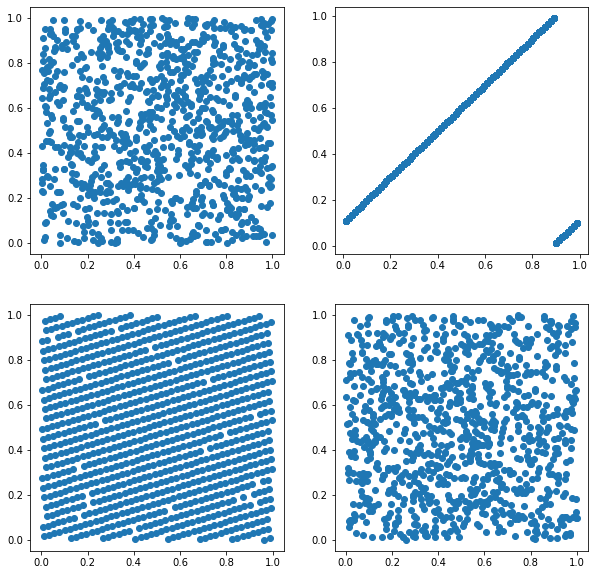

In [30]:
### BEGIN SOLUTION
import random
# Comparing 4 PRNGs
nsamples = 1000
sample_1 = np.array([random.random() for x in range(nsamples)])
sample_2 = random_uniform(seed=0, m=81,   a=1, c=8, size=nsamples)
sample_3 = random_uniform(seed=0, m=1024, a=401, c=101, size=nsamples)
sample_4 = random_uniform(seed=0, m=2**32, a=1664525, c=1013904223, size=nsamples)

# This codes generates a 4x4 grid with scatter plots. Each subplot creates a
# new plot with position subplot(nrows, ncolums, number of plot)
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.scatter(sample_1[:nsamples-1], sample_1[1:nsamples])

plt.subplot(222)
plt.scatter(sample_2[:nsamples-1], sample_2[1:nsamples])

plt.subplot(223)
plt.scatter(sample_3[:nsamples-1], sample_3[1:nsamples])

plt.subplot(224)
plt.scatter(sample_4[:nsamples-1], sample_4[1:nsamples]);
### END SOLUTION

In [31]:
### BEGIN HIDDEN TESTS
s = [sample_1 - sample_1.mean(), sample_2 - sample_2.mean(),
     sample_3 - sample_3.mean(), sample_4 - sample_4.mean()]

assert np.sort(np.correlate(s[0], s[0], 'full'))[-2] < 10
assert np.sort(np.correlate(s[1], s[1], 'full'))[-2] > 70
assert np.sort(np.correlate(s[2], s[2], 'full'))[-2] > 30
assert np.sort(np.correlate(s[3], s[3], 'full'))[-2] < 10
### END HIDDEN TESTS

The first scatter plot is an example of what to expect from a good PRNG that
outputs a sequence of random numbers that look uncorrelated. From the second
scatter plot it is clear that each $X_{i}$ can only be followed by exactly one
value $X_{i+1}$. While the same is true for scatter plots 3 and 4, the dependence
is much convoluted there and in particular the structure of 4 is visually
indistinguishable from the structure of 1.

Takeaways:
- Reusing the same seed allows for reproducibility and debugging. 
- With this source of pseudo randomness we can construct any random variable we want by transforming the outcome.

## Uniformity or goodness-of-fit tests

Let $X_1, \ldots , X_n$ be $n$ observations. A goodness-of-fit test can be used to test the hyphothesis:

$H_0$: The $X_i$'s are i.i.d. random variables with distribution function $F$.

Two goodness-of-fit tests:
- Kolmogorov-Smirnov test
- Chi-Square test

### Kolmogorov-Smirnov test
The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case).

![](figures/ks-test.png)

Let $F_n(x)$ be the empirical distribution function, so
$$
F_n(x) = \frac{\text{number of }X_i\text{'s}\leq x}{n}
$$
Then
$$
D_n = \underset{x}{\operatorname{sup}}\left|F_n(x) - F(x)\right| 
$$
has the Kolmogorov-Smirnov distribution.

Now we reject $H_0$ if
$$
D_n > d_{n, 1-\alpha}
$$
where $d_{n, 1-\alpha}$ is the $1-\alpha$ quantile of the K-S distribution.

Here $\alpha$ is the significance level of the test:
The probability of rejecting $H_0$ given that $H_0$ is true.

In [63]:
from scipy.stats import kstest, uniform

sample = random_uniform(size=100)
kstest(sample, uniform.cdf)

KstestResult(statistic=0.07273380154680142, pvalue=0.6385079101128477)

### Chi-Squared test
Divide the range of $F$ into $k$ adjacent intervals
$$
(a_0, a_1], (a_1, a_2], \ldots , (a_{k-1}, a_k]
$$
Let
$$
N_j = \text{number of }X_i\text{'s in }[a_{j-1}, a_j)
$$
and let $p_j$ be the probability of an outcome in $(a_{j-1}, a_j]$, so
$$
p_j = F(a_j) - F(a_{j-1}
$$
The test statistic is
$$
\chi^2 = \sum_{j=1}^k \frac{(N_j - n p_j)^2}{n p_j}
$$
If $H_0$ is true, then $n p_j$ is the  expected number of the $n$ $X_i$'s that fall in the j-th interval, and so we expect $\chi^2$ to be small.

If $H_0$ is true, then the distribution of $\chi^2$ converges to a chi-square distribution with $k - 1$ degrees of freedom as $n \rightarrow \infty$.

The chi-square distribution with $k - 1$ degrees of freedom is the same as the Gamma distribution with parameters $(k - 1)/2$ and 2.
Hence, we reject $H_0$ if $\chi^2 > \chi^2_{k-1,1-\alpha}$, where $\chi^2_{k-1,1-\alpha}$ is the $1 - \alpha$ quantile of the chi-square distribution with $k - 1$ degrees of freedom.

For U(0, 1) random variables, we divide (0, 1) into $k$ subintervals of equal length and generate $U_1, \ldots , U_n$; it is recommended to choose $k \geq 100$ and $n/k \geq 5$. Let $N_j$ be the number of the $n$ $U_i$'s in the j-th subinterval. Then
$$
\chi^2 = \frac{k}{n}\sum_{j=1}^k\left(N_j - n/k\right)^2
$$

In [87]:
from scipy.stats import chisquare
import numpy as np

n = int(2**15)
sample = random_uniform(size=n)
k = int(2**12)

# Observed freq
f_obs = np.histogram(sample, bins=k)[0]
# Expected freq
f_exp = [n/k]*k

chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=4160.0, pvalue=0.23519809690726046)

## Tests for independence

### Serial test
This is a 2-dimensional version of the chi-square test to test independence between successive observations. We generate $U1, \ldots , U_{2n}$; if the $U_i$'s are really i.i.d. U(0, 1), then the non-overlapping pairs
$$
(U_1, U_2), (U_3, U_4), \ldots , (U_{2n-1}, U_{2n})
$$
are i.i.d. random vectors uniformly distributed in the square $(0, 1)^2$.

- Divide the square $(0, 1)^2$ into $k^2$ sub-squares;
- Count how many outcomes fall in each sub-square;
- Apply a chi-square test to these data.

This test can be generalized to higher dimensions.

### Permutation test
Look at $n$ successive d-tuples of outcomes
$$
(U_0, \ldots , U_{d-1}), (U_d, \ldots , U_{2d-1}),\ldots , (U_{(n-1)d}, \ldots , U_{nd-1});
$$
Among the d-tuples there are $d!$ possible orderings and these orderings are equally likely.
- Determine the frequencies of the different orderings among the $n$ d-tuples;
- Apply a chi-square test to these data.

### Runs-up test

Divide the sequence $U_0, U_1, \ldots$ in blocks, where each block is a subsequence of increasing numbers followed by a number that is smaller than its predecessor.

Example: The realization 1,3,8,6,2,0,7,9,5 can be divided in the blocks (1,3,8,6), (2,0), (7,9,5).

A block consisting of $j + 1$ numbers is called a run-up of length $j$. It holds that
$$
P(\text{run-up of length }j) = \frac{1}{j!} - \frac{1}{(j+1)!}
$$

- Generate $n$ run-ups;
- Count the number of run-ups of length $0, 1, 2, \ldots , k - 1$ and $\geq k$;
- Apply a chi-square test to these data.

### Correlation test

Generate $U_0, U_1, \ldots , U_n$ and compute an estimate for the (serial) correlation
$$
\hat\rho_1 = \frac{\sum_{i=1}^m(U_i - \bar{U})(U_{i+1} - \bar{U})}{\sum_{i=1}^m(U_i - \bar{U})^2}
$$
where $U_{n+1} = U_1$ and $\bar{U}$ the sample mean.

If the $U_i$'s are really i.i.d. U(0, 1), then $\hat{\rho}_1$ should be close to zero. Hence we reject $H_0$ if $\hat\rho_1$ is too large.

If $H_0$ is true, then for large $n$
$$
P(-2/\sqrt{n}\leq \hat\rho_1\leq 2/\sqrt{n}) \approx 0.95
$$

So we reject $H_0$ at the 5% level if
$$
\hat\rho_1 \not\in (-2/\sqrt{n}, 2/\sqrt{n})
$$